Name : Motaleb Hossain  ID: 2125051071

In [23]:
import pandas as pd
import numpy as np

In [24]:
from google.colab import drive

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 1. Importing Necessary Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
# 2. Dataset Path (Ensure the dataset is downloaded and extracted)
dataset_path = '/content/drive/MyDrive/Autumn 24-Machine learning lab/Lab Project /Dataset'

In [6]:
# 3. Data Preparation
def load_images_labels(dataset_path):
    categories = os.listdir(dataset_path)
    images = []
    labels = []

    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (64, 64))  # Resize for consistency
                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

images, labels = load_images_labels(dataset_path)

In [7]:
# Normalize the images
images = images / 255.0  # Scale pixel values to [0, 1]

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
# One-hot encode labels for CNN
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [10]:
# 4. Conventional Machine Learning: HOG + SVM
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY)
        features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

hog_train_features = extract_hog_features(X_train)
hog_test_features = extract_hog_features(X_test)

In [11]:
# Train SVM Classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(hog_train_features, y_train)

SVC(kernel='linear', probability=True)

In [22]:
# Predict and evaluate SVM
svm_predictions = svm.predict(hog_test_features)

# Define a dictionary to map numerical labels to their corresponding names
label_names = {
    0: "Bus",
    1: "Car",
    2: "Truck",
    3: "Motorcycle"
}

# Convert numerical predictions to label names
svm_predictions_labels = [label_names[prediction] for prediction in svm_predictions]
y_test_labels = [label_names[label] for label in y_test]  # Convert true labels as well

# Print classification report with label names
print("SVM Classification Report:\n", classification_report(y_test_labels, svm_predictions_labels))

SVM Classification Report:
               precision    recall  f1-score   support

         Bus       0.86      0.73      0.79        26
         Car       0.57      0.67      0.62        18
  Motorcycle       0.70      0.78      0.74        18
       Truck       0.65      0.61      0.63        18

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.69        80
weighted avg       0.71      0.70      0.70        80



In [20]:
# 5. Convolutional Neural Network
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train CNN
history = cnn_model.fit(X_train, y_train_cnn, epochs=10, batch_size=32, validation_data=(X_test, y_test_cnn))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.2576 - loss: 1.5275 - val_accuracy: 0.3875 - val_loss: 1.3722
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.3592 - loss: 1.3649 - val_accuracy: 0.2875 - val_loss: 1.3698
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.5032 - loss: 1.2595 - val_accuracy: 0.4875 - val_loss: 1.2355
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.5735 - loss: 1.0620 - val_accuracy: 0.5750 - val_loss: 1.0955
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 0.6560 - loss: 0.8667 - val_accuracy: 0.5250 - val_loss: 1.2328
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.6583 - loss: 0.8074 - val_accuracy: 0.6625 - val_loss: 1.0565
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.7739 - loss: 0.7018 - val_accuracy: 0.5875 - val_loss: 1.0380
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.7777 - loss: 0.5700 - val_accuracy: 0.

In [15]:
# Evaluate CNN
cnn_eval = cnn_model.evaluate(X_test, y_test_cnn)
print("CNN Test Accuracy:", cnn_eval[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6656 - loss: 1.1588
CNN Test Accuracy: 0.675000011920929


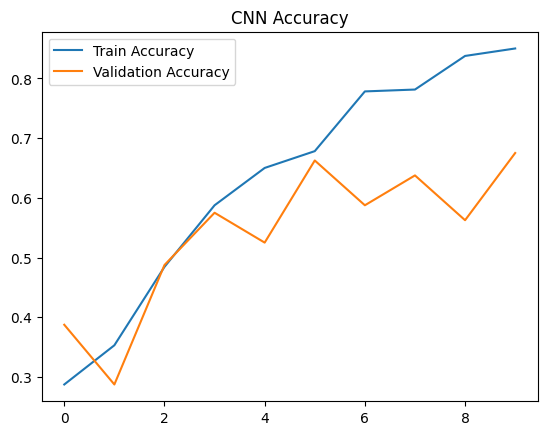

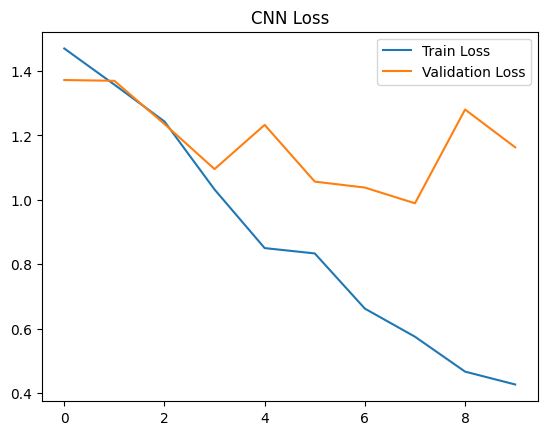

In [16]:
# 6. Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()


In [17]:
# Save the trained CNN model
cnn_model.save("vehicle_type_cnn_model.h5")